# Explore here

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

Paso 2: Realiza un EDA completo
Este segundo paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en lecciones anteriores.

Paso 3: Construye un modelo de árbol de decisión
Comienza a resolver el problema implementando un árbol de decisión y analiza cuál de los dos tipos satisface tus necesidades. Entrénalo y analiza sus resultados. Prueba a modificar la función de cálculo de la pureza de los nodos y utiliza todas las disponibles. Descríbelas y analiza sus resultados graficándolos.

Paso 4: Optimiza el modelo anterior
Después de entrenar el árbol con las distintas funciones de pureza, selecciona el mejor de ellos y optimiza sus hiperparámetros utilizando un grid search.

Paso 5: Guarda el modelo
Almacena el modelo en la carpeta correspondiente.

In [2]:
# Your code here
# Your code here
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pickle import dump


dataset = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.to_csv("../data/raw/total_data.csv", index = False)


DATOS:

- Pregnancies. Número de embarazos del paciente (numérico)
- Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI. Índice de masa corporal (numérico)
- DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
- Age. Edad del paciente (numérico)
- Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

In [4]:
dataset.shape

(768, 9)

The DataFrame contains 768 records (rows) and 9 variables (columns).

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No hay nulos en esta dataset

In [7]:
duplicados=dataset.duplicated().sum()
duplicados

0

No hay duplicados

Todos datos son numericos 


DATOS:

- Pregnancies. Número de embarazos del paciente (numérico)
- Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI. Índice de masa corporal (numérico)
- DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
- Age. Edad del paciente (numérico)
- Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

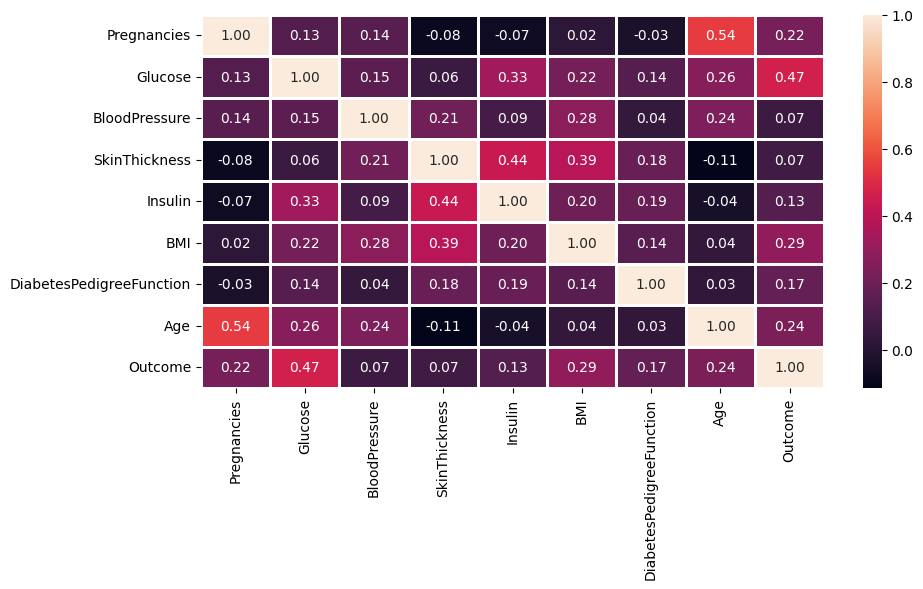

In [8]:
#correlacion

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dataset[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()

- Glucose y Outcome fuerte relacon
-  pregnance y Age
-  Age y Outcome
-- Insulin y BMI
-  Insulin Y DiabetesPedigreeFuncion
-  Insulin y SkinThickness
-  Insulin y Glucose
-- DiabetesPedigreeFuncion y Outcome y algo con Bmi


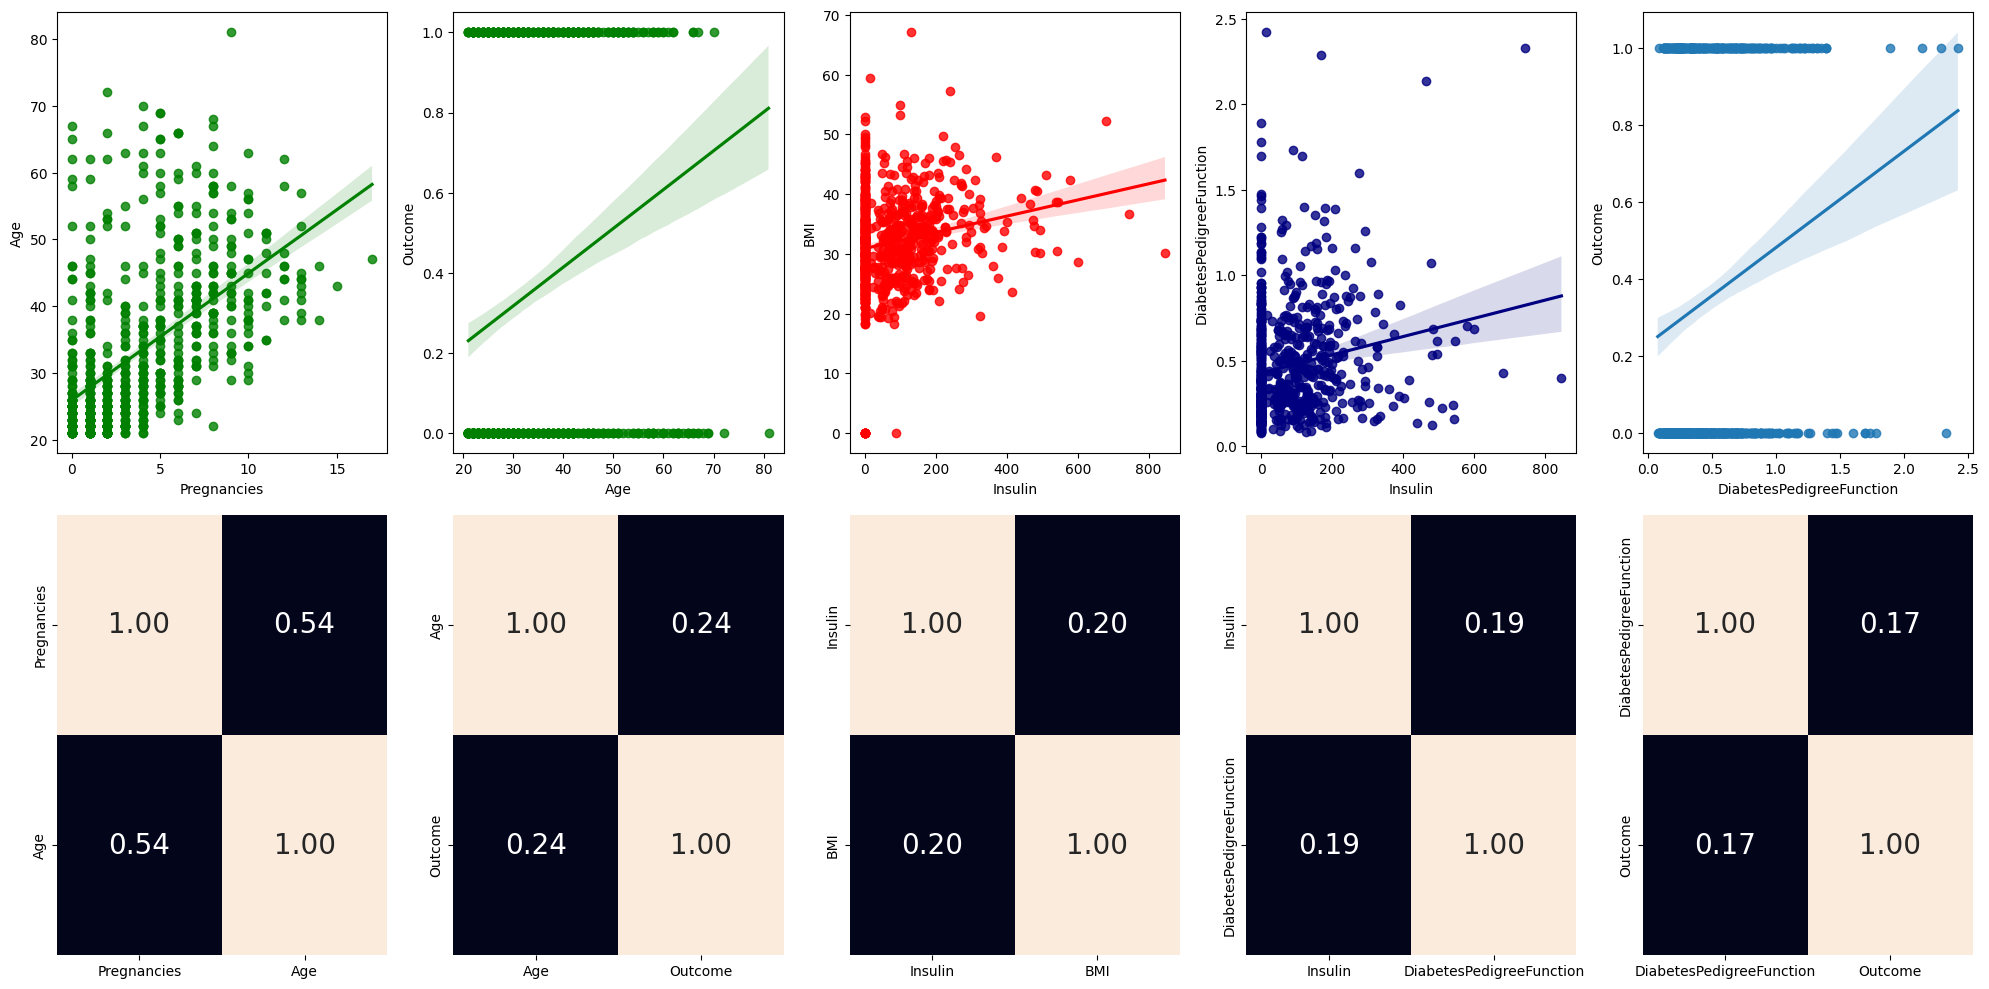

In [9]:
#Numeric-numeric
fig, axis = plt.subplots(2, 5, figsize = (20, 10))



sns.regplot(ax = axis[0, 0], data = dataset , x = "Pregnancies", y = "Age", color='green')
sns.heatmap(dataset[["Pregnancies", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False,annot_kws={'fontsize': 20})

sns.regplot(ax = axis[0, 1], data = dataset , x = "Age", y = "Outcome" ,color='green' )
sns.heatmap(dataset[["Age", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False,annot_kws={'fontsize': 20})

sns.regplot(ax = axis[0, 2], data = dataset , x = "Insulin", y = "BMI",color='red')
sns.heatmap(dataset[["Insulin", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False,annot_kws={'fontsize': 20})

sns.regplot(ax = axis[0, 3], data = dataset , x = "Insulin", y = "DiabetesPedigreeFunction", color='navy')
sns.heatmap(dataset[["Insulin", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False,annot_kws={'fontsize': 20})

sns.regplot(data = dataset, x = "DiabetesPedigreeFunction", y = "Outcome", ax = axis[0, 4])
sns.heatmap(dataset[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 4], cbar = False,annot_kws={'fontsize': 20})



plt.tight_layout()
plt.show()

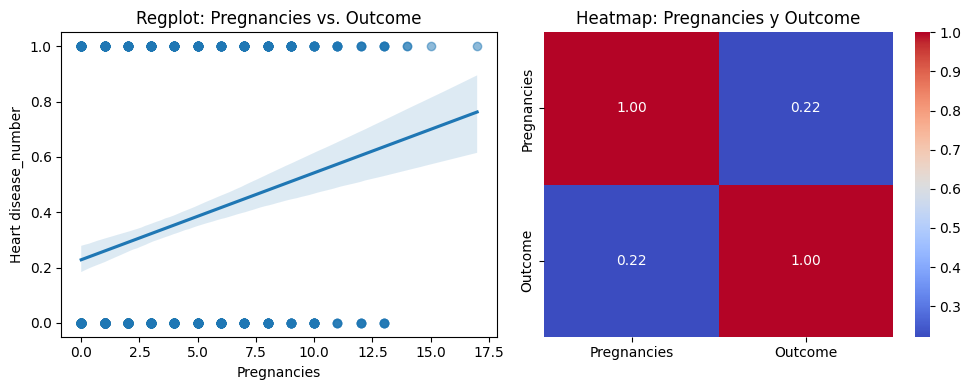

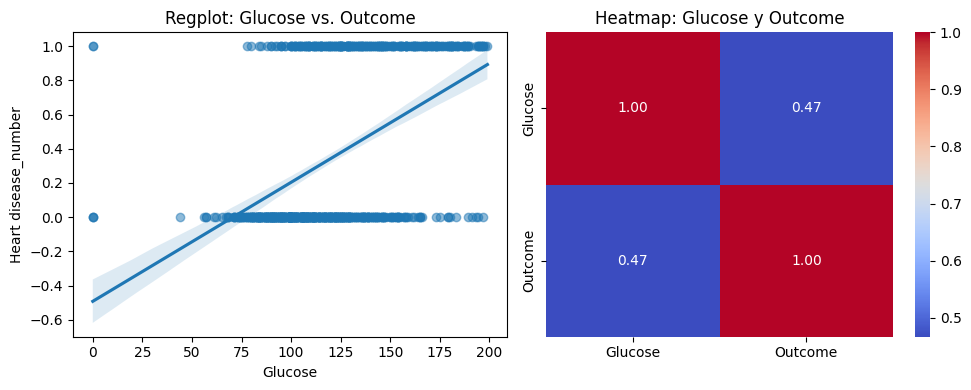

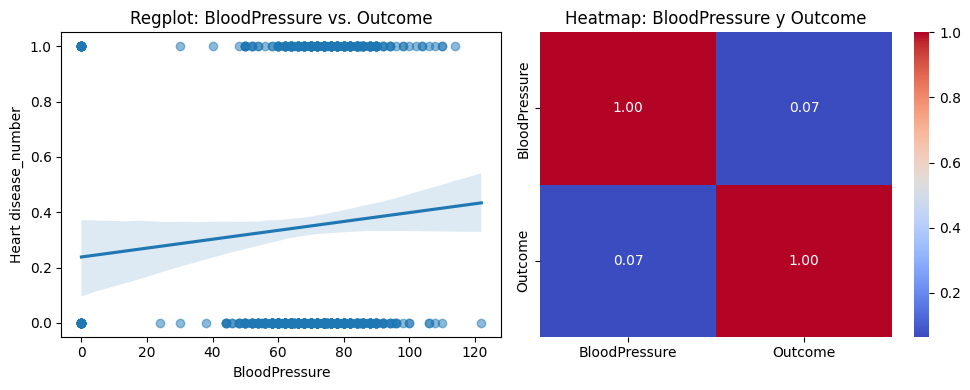

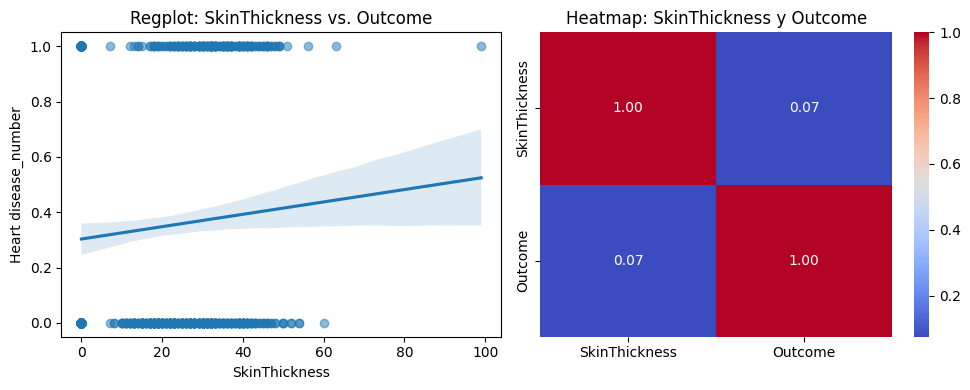

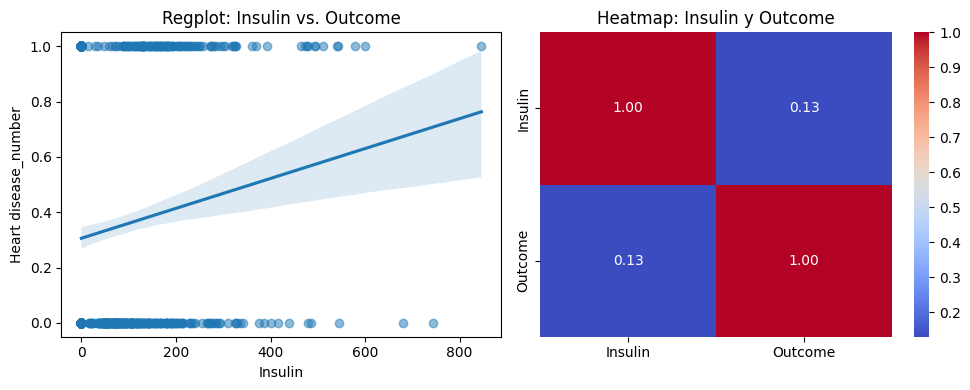

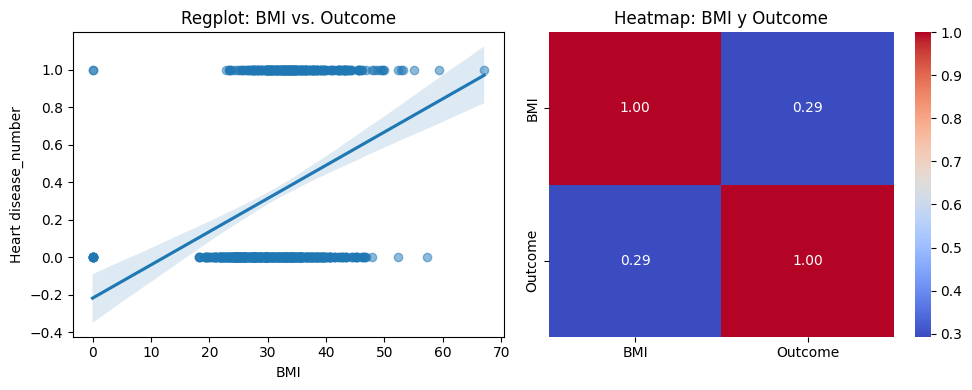

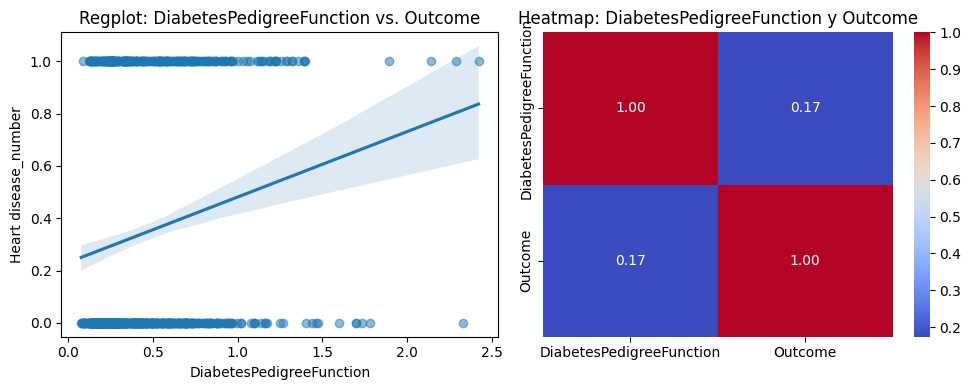

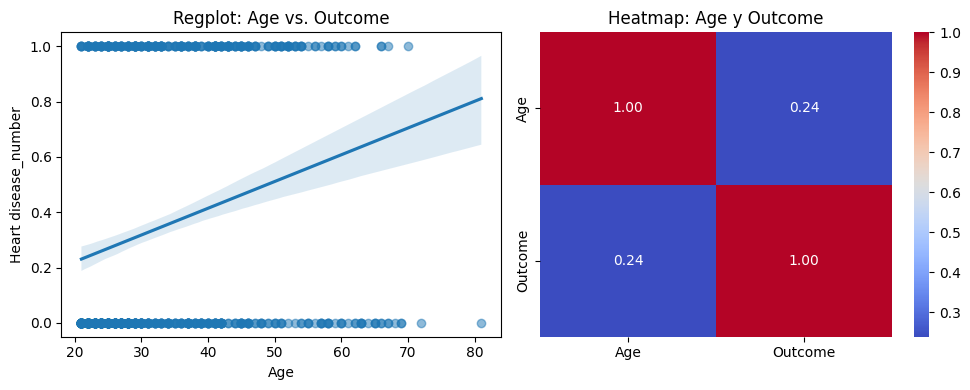

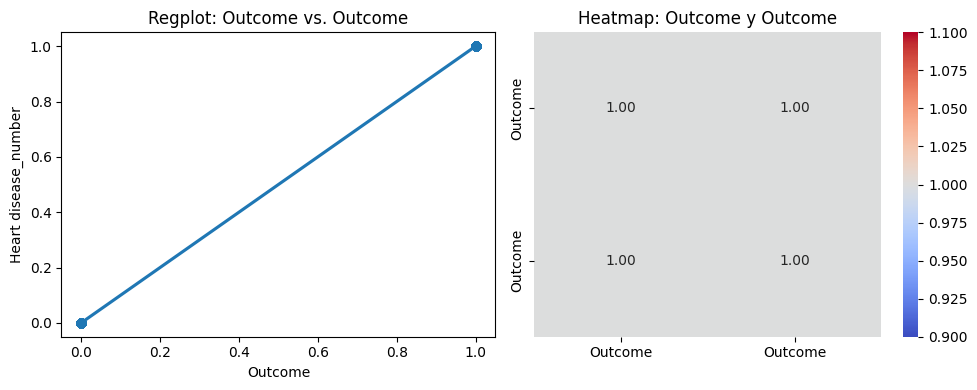

In [10]:
for column in dataset.columns:
    if column != 'Heart disease_number':
        plt.figure(figsize=(10, 4)) 
        
        # Regplot 
        plt.subplot(1, 2, 1)  
        sns.regplot(data=dataset, x=column, y='Outcome', scatter_kws={'alpha': 0.5})
        plt.title(f'Regplot: {column} vs. Outcome')
        plt.xlabel(column)
        plt.ylabel('Heart disease_number')

        # Heatmap 
        plt.subplot(1, 2, 2)  
        sns.heatmap(dataset[[column, 'Outcome']].corr(), annot=True, fmt= ".2f", cmap='coolwarm')
        plt.title(f'Heatmap: {column} y Outcome')

        plt.tight_layout()  
        plt.show()

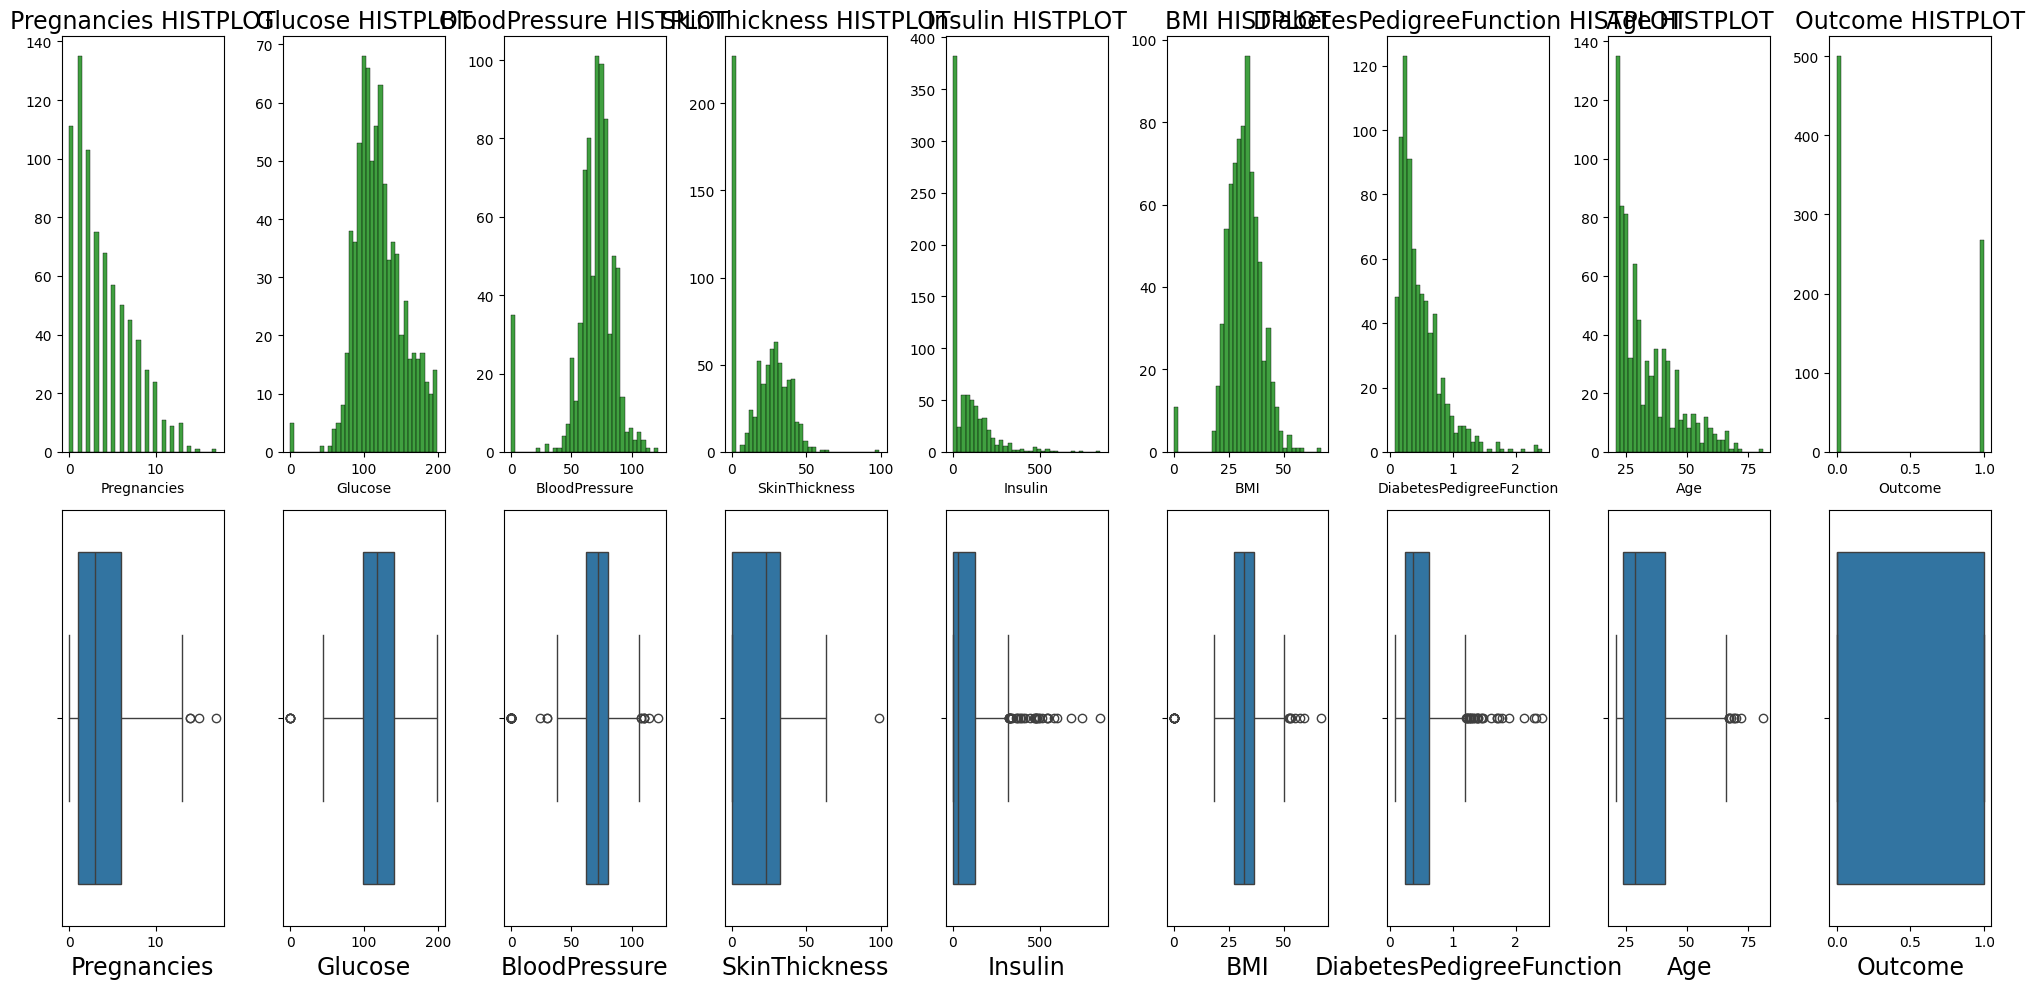

In [11]:
fig, axis = plt.subplots(2, 9, figsize=(20, 10))
columns = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']

for i, column in enumerate(columns):
    row = i // 9
    col = i % 9
    
    # Histograma
    sns.histplot(ax=axis[row, col], data=dataset, x=column, bins=35, color='green' ).set(ylabel=None)
    axis[row, col].set_title(f'{column} HISTPLOT', fontdict={'fontsize': 17})  # Ajustar tamaño de fuente del título
    
    # Diagrama de caja
    sns.boxplot(ax=axis[row + 1, col], data=dataset, x=column)
    axis[row + 1, col].set_xlabel(column, fontsize=17)  # Establecer tamaño de fuente del eje x

plt.tight_layout()
plt.show()

In [12]:
dataset1 = dataset[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']].describe()
dataset1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
age_stats = dataset1.loc[[ '25%', '75%'], ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]

# Calcular los límites y el rango intercuartílico para cada variable
for column in age_stats.columns:
    # Calcular el rango intercuartílico (IQR)
    age_iqr = age_stats.loc['75%', column] - age_stats.loc['25%', column]
    # Calcular los límites superior e inferior para la detección de valores atípicos
    upper_limit = age_stats.loc['75%', column] + 1.5 * age_iqr
    lower_limit = age_stats.loc['25%', column] - 1.5 * age_iqr

    # Imprimir los resultados
    print(f"Para la variable '{column}', los límites superior e inferior para la búsqueda de valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Para la variable 'Pregnancies', los límites superior e inferior para la búsqueda de valores atípicos son 13.5 y -6.5, con un rango intercuartílico de 5.0
Para la variable 'Glucose', los límites superior e inferior para la búsqueda de valores atípicos son 202.12 y 37.12, con un rango intercuartílico de 41.25
Para la variable 'BloodPressure', los límites superior e inferior para la búsqueda de valores atípicos son 107.0 y 35.0, con un rango intercuartílico de 18.0
Para la variable 'SkinThickness', los límites superior e inferior para la búsqueda de valores atípicos son 80.0 y -48.0, con un rango intercuartílico de 32.0
Para la variable 'Insulin', los límites superior e inferior para la búsqueda de valores atípicos son 318.12 y -190.88, con un rango intercuartílico de 127.25
Para la variable 'BMI', los límites superior e inferior para la búsqueda de valores atípicos son 50.55 y 13.35, con un rango intercuartílico de 9.3
Para la variable 'DiabetesPedigreeFunction', los límites superior e i

In [14]:
datasetclas = dataset1.copy()

In [15]:
datasetclas.to_csv("../data/raw/total_data_class.csv", index = False)

In [17]:
#select x and y data
X = datasetclas.drop('Outcome', axis= 1)
y = datasetclas['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
count,0.000000,118.947266,149.057659,0.000000,0.000000,121.359592,0.078000,11.760232
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
max,17.000000,199.000000,122.000000,99.000000,0.000000,67.100000,0.078000,81.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885


In [18]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.60000,0.626250,41.000000
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.88416,0.331329,11.760232


In [21]:
X_train["Outcome"] = y_train.values
X_test["Outcome"] = y_test.values
X_train.to_csv("../data/processed/clean_train_conoutliers.csv", index = False)
X_test.to_csv("../data/processed/clean_test_conoutliers.csv", index = False)

Decision Tree model

In [23]:
train_data = pd.read_csv("../data/processed/clean_train_conoutliers.csv")
test_data = pd.read_csv("../data/processed/clean_test_conoutliers.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,0.0,0.0,0.0,0.0,0.0,0.07800,21.0,0.0
1,768.0,768.0,768.0,768.0,768.0,768.0,768.00000,768.0,768.0
2,1.0,99.0,62.0,0.0,0.0,27.3,0.24375,24.0,0.0
3,3.0,117.0,72.0,23.0,30.5,32.0,0.37250,29.0,0.0
4,17.0,199.0,122.0,99.0,846.0,67.1,2.42000,81.0,1.0


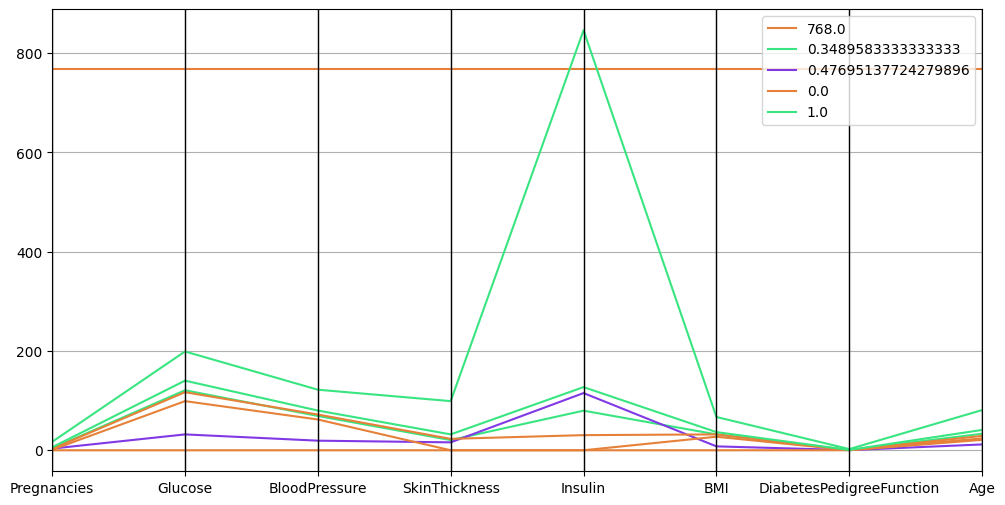

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(datasetclas, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [28]:
X_train = datasetclas.drop(["Outcome"], axis = 1)
y_train = datasetclas["Outcome"]
X_test = datasetclas.drop(["Outcome"], axis = 1)
y_test = datasetclas["Outcome"]

In [32]:
model = DecisionTreeClassifier(random_state = 12)
model.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Para calcular la efectividad del modelo utilizaremos el error cuadrático medio (MSE):

En tu caso, un MSE de 294546.03 indica que, en promedio, las predicciones del modelo están alejadas de los valores reales por aproximadamente 294546.03 unidades al cuadrado. Este valor puede variar dependiendo del problema específico y del rango de valores en el conjunto de datos. Si estás trabajando con valores grandes, como ingresos o precios de viviendas, un MSE de este tamaño podría considerarse aceptable. 

- Sin embargo, estámos trabajando con valores más pequeños, como medidas médicas, este MSE podría indicar que el modelo necesita mejorar.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar y sus rangos
param_grid = {
    "criterion": ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto de búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

# Ajustar el objeto de búsqueda de cuadrícula a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Reentrenar el modelo con los mejores hiperparámetros
best_model = DecisionTreeRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)

Mejores hiperparámetros: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeRegressor(criterion='friedman_mse', random_state=42)

In [ ]:
y_pred1 = best_model.predict(X_test)
y_pred1

array([3.48958333e-01, 7.68000000e+02])

In [ ]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred1)}")

Error cuadrático medio: 294546.0270112115


optimizacion parametr no ha dado mejoria

In [ ]:
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 12)
model.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.